In [2]:
import numpy as np
import matplotlib.pyplot as plt

# h - длина шага
def prepare_h(x_1, x_n, n):
    x = np.linspace(x_1, x_n, n + 1)
    y = np.zeros(n + 1)  
    h = (x_n - x_1) / n
    return x, y, h

# аналитическое решение
def real_func(f, n, x_1, x_n):
    x, y, h = prepare_h(x_1, x_n, n)
    for i in range(len(x)):
        y[i] = f(x[i])
    return x, y

# метод Эйлера
def euler(f, y0, n, x_1, x_n):
    x, y, h = prepare_h(x_1, x_n, n)
    y[0] = np.array(y0)
    for n in range(n):
        y[n + 1] = y[n] + h * f(x[n], y[n])
    return x, y

# двухшаговый метод Адамса – Башфорта
def adams2(f, y0, n, x_1, x_n):
    x, y, h = prepare_h(x_1, x_n, n)
    y[0] = np.array(y0)
    y[1] = euler(f, y0, n, x[0], x[1])[1][-1]
    for n in range(1, n):
        y[n + 1] = y[n] + h * (3 * f(x[n], y[n]) - f(x[n - 1], y[n - 1])) / 2
    return x, y

# трёхшаговый метод Адамса – Башфорта
def adams3(f, y0, n, x_1, x_n):
    x, y, h = prepare_h(x_1, x_n, n)
    y[0] = np.array(y0)
    y[1] = euler(f, y0, n, x[0], x[1])[1][-1]
    y[2] = adams2(f, y0, n, x[0], x[2])[1][-1]
    for n in range(2, n):
        y[n + 1] = y[n] + h * (23 / 12 * f(x[n], y[n]) - 4 / 3 * f(x[n - 1], y[n - 1]) + 5 / 12 * f(x[n - 2], y[n - 2]))
    return x, y

# функция, считающая отколонение от аналитического решения
def s_error(assumed, real):
    summ = 0
    for i in range(len(real)):
        summ += (abs(assumed[i] - real[i]))
    return summ

# вывод ошибки
def print_error(real, euler_y, adams_y, adams_3_y):
    print("Отклонение")
    print("Euler:            ", s_error(euler_y, real))
    print("Adams-Bashforth-2:", s_error(adams_y, real))
    print("Adams-Bashforth-3:", s_error(adams_3_y, real))

In [3]:
# Построенине графиков и сравнеие методов
def compare(func, func_solution, y0, n, x_1, x_n):
    x = prepare_h(x_1, x_n, n)[0]
    euler_y = euler(func, y0, n, x_1, x_n)[1]
    adams2_y = adams2(func, y0, n, x_1, x_n)[1]
    adams3_y = adams3(func, y0, n, x_1, x_n)[1]
    real_x, real_y = real_func(func_solution, 10000, x_1, x_n)
    fig = plt.figure(figsize = (8,8))
    p1, p2, p3, p4 = plt.plot(x, euler_y, x, adams2_y, x, adams3_y, real_x , real_y)
    fig.legend([p1, p2, p3, p4],['Euler', 'Adams-Bashforth-2', 'Adams-Bashforth-3', 'Real'])
    print_error(real_func(func_solution, n, x_1, x_n)[1], euler_y, adams2_y, adams3_y)
    plt.show()

In [4]:
def f1(x, y):
    return x * np.power(np.e, -(x ** 2)) - 2 * x * y

def f1_solution(x):
    return ((x ** 2) / 2 + 1) * np.power(np.e, -(x ** 2))

def f2(x, y):
    return 1 + (y ** 2)

def f2_solution(x):
    return np.tan(x + np.e / 4)

def f3(x, y):
    return y - x

def f3_solution(x):
    return x + 1

def f4(x, y):
    return -y * np.tan(x) + 1 / np.cos(x)

def f4_solution(x):
    return np.sin(x) + np.cos(x)



# Пример 1

 $y' = xe^{-x^2}-2xy$

Решение: $y = (\frac{x^2}{2}+1)e^{-x^2}$ при начальном условии $y(0)=1$

Отклонение
Euler:             0.4609283737965971
Adams-Bashforth-2: 0.16196789987685173
Adams-Bashforth-3: 0.010388935349419537


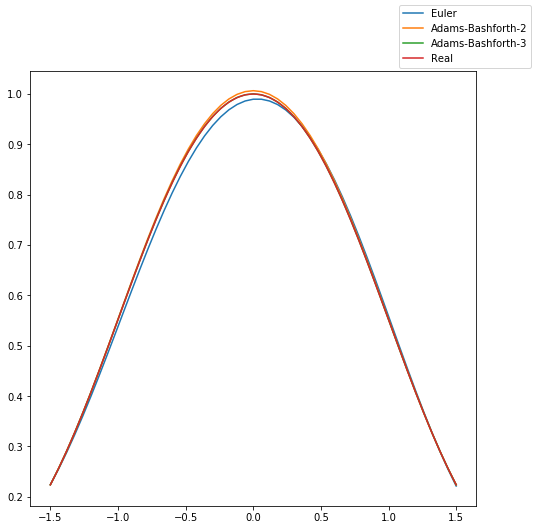

In [18]:
steps = 50
interval_from = -1.5
interval_to = 1.5
compare(f1, f1_solution, f1_solution(interval_from), steps, interval_from, interval_to)

# Пример 2

ДУ: $y' -ytgx+\frac{1}{cosx}$

$y = sinx+cosx$ при начальном условии $y(0)=1$

Отклонение
Euler:             22.768941101569364
Adams-Bashforth-2: 6.195752992902557
Adams-Bashforth-3: 0.2637822169199052


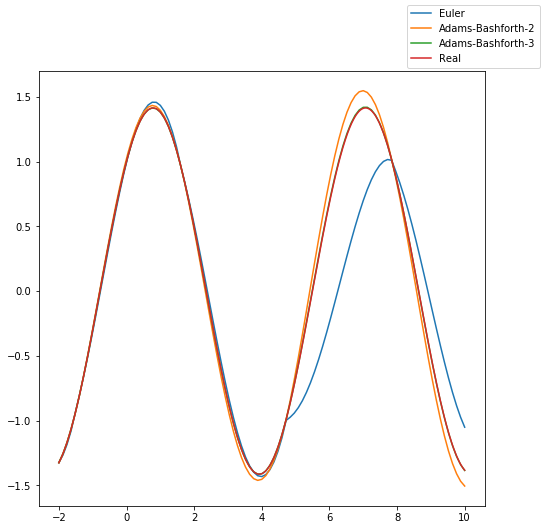

In [19]:
steps = 100
interval_from = -2
interval_to = 10
compare(f4, f4_solution, f4_solution(interval_from), steps, interval_from, interval_to)

# Пример 3

ДУ: $y' = 1+y^2$ 

Решение: $y = tg(x + \frac{\pi}{4})$ при начальном условии $y(0)=1$

Отклонение
Euler:             10.006511964589354
Adams-Bashforth-2: 6.773984860228202
Adams-Bashforth-3: 4.9312592589790025


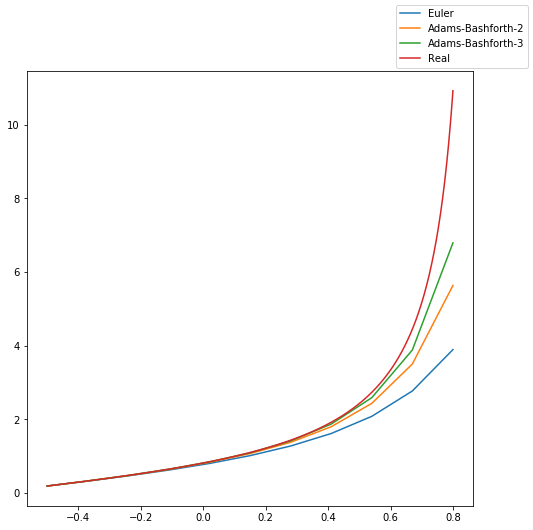

In [7]:
steps = 10
interval_from = -0.5
interval_to = 0.8
compare(f2, f2_solution, f2_solution(interval_from), steps, interval_from, interval_to)

# Пример 4

ДУ: $y' = y - x$ 

Решение: $y = x + 1$ при начальном условии $y(0)=1$

Отклонение
Euler:             0.0
Adams-Bashforth-2: 1.6522818668818218e-09
Adams-Bashforth-3: 4.369261485948073e-08


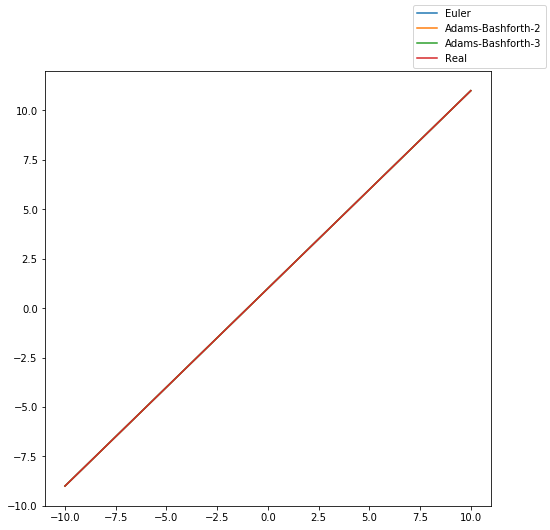

In [8]:
steps = 10
interval_from = -10
interval_to = 10
compare(f3, f3_solution, f3_solution(interval_from), steps, interval_from, interval_to)